## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [69]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [70]:
# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Checking the number of mice.
mouse_data["Mouse ID"].nunique()

249

In [72]:
# Checking the total number of rows.
mouse_data.shape[0]

1893

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data["Dupes"] = mouse_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupes
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = mouse_data.loc[mouse_data['Dupes'] == True, :]

# Get all duplicate mice
dupe_mice = dupe_mouse_data["Mouse ID"].unique()
dupe_mice

array(['g989'], dtype=object)

In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Iterate through the list of dupe mice and 
for mouse in dupe_mice:
    mouse_data = mouse_data[mouse_data['Mouse ID'] != mouse]

# We don't need the Dupes column anymore
del mouse_data['Dupes']
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice in the clean DataFrame.
mouse_data["Mouse ID"].nunique()

248

In [77]:
mouse_data.shape[0]

1880

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Starting with an overview of the data
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_stats = mouse_data.groupby('Drug Regimen')
tumor_stats.sum()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,3095,4592,4960,9355.420462,164
Ceftamin,2358,4877,3515,9361.228582,210
Infubinol,2889,4841,3235,9413.493529,171
Ketapril,2944,5238,3705,10384.299876,244
Naftisol,2232,5053,3650,10105.671026,220
Placebo,1943,5055,3380,9780.078122,261
Propriva,1481,4016,2525,7743.497619,150
Ramicane,2436,4487,4885,9169.417875,125
Stelasyn,2314,5042,3480,9816.199991,158


In [80]:
tumor_mean = tumor_stats['Tumor Volume (mm3)'].mean()
tumor_median = tumor_stats['Tumor Volume (mm3)'].median()
tumor_variance = tumor_stats['Tumor Volume (mm3)'].var()
tumor_std = tumor_stats['Tumor Volume (mm3)'].std()
tumor_sem = tumor_stats['Tumor Volume (mm3)'].sem()

In [81]:
# Assemble the resulting series into a single summary dataframe.
tumor_stats_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                              "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_variance,
                              "Tumor Volume Std. Dev.": tumor_std,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_fast_stats = mouse_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    var=('Tumor Volume (mm3)', 'var'),
    sem=('Tumor Volume (mm3)', 'sem')
)
mouse_fast_stats


,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by Drug Regimen
drug_groups = mouse_data.groupby('Drug Regimen')

# Count Timepoint totals
timepointsByRegimen = drug_groups['Timepoint'].count()

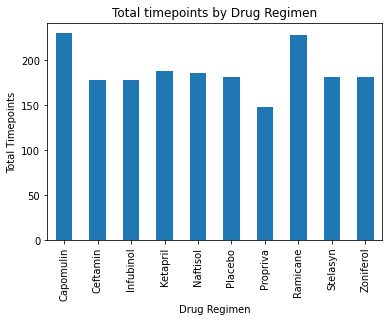

In [84]:
# Build Bar chart
timepoints_chart = timepointsByRegimen.plot(kind="bar", title="Total timepoints by Drug Regimen")
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Total Timepoints")
plt.show()

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Prepare data
y_axis = timepointsByRegimen.tolist()
x_axis = np.arange(len(y_axis))
y_axis

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

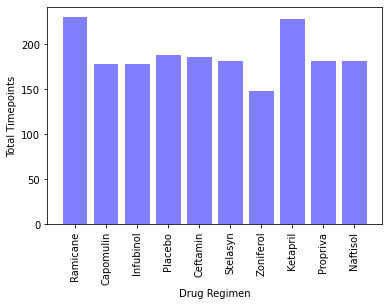

In [90]:
# Build Bar chart

# Add tick marks and labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_data['Drug Regimen'].unique(), rotation='vertical')

# Define the bars
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

# Label the axes and add a title
plt.title="Total timepoints by Drug Regimen"
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
